In [1]:
import numpy as np   
import matplotlib.pyplot as plot
%matplotlib inline

# Ambient state

In [2]:
from pycfd.reference.atmospheric_flow import stratification_profiles, saturation_calculation

ambient_stratification = stratification_profiles.Soong1973Dry()

T_e = lambda z: ambient_stratification.temp(z)
p_e = ambient_stratification.p

# Model integration

In [3]:
import odespy, numpy
from pyclouds import cloud_equations, plotting, cloud_microphysics
from pyclouds.common import Var

In [4]:
g = ambient_stratification.g
R_d = ambient_stratification.gas_properties.R()
cp_d = ambient_stratification.gas_properties.cp()

environment = ambient_stratification
constants = {'R_d': R_d, 'cp_d': cp_d, 'g': g }

In [11]:
z_points = numpy.linspace(100., 10e3, 500)

w0 = 0.05
T0 = ambient_stratification.temp(0.0) + 0.1
p0 = ambient_stratification.p(0.0)
# r, w, T, q_v, q_r, q_l, q_i
initial_condition = Var.make_state(r=600., w=w0, T=T0, q_v=0.012, q_l=0.0, q_i=0.0, p=p0)

Integration stopped: vertical velocity dropped to zero
RKFehlberg terminated at t=5833.67


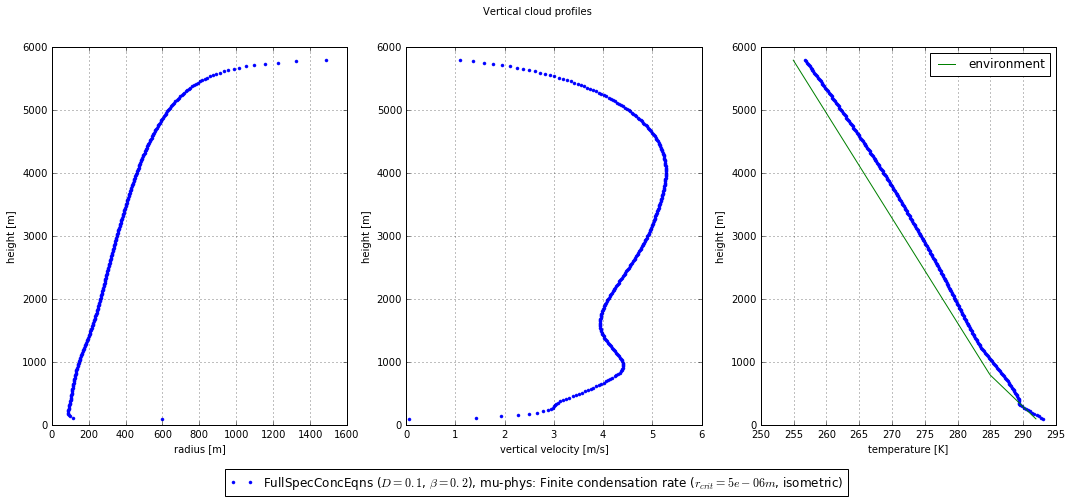

In [12]:
beta = 0.2
microphysics = cloud_microphysics.FiniteCondensationTimeMicrophysics()
cloud_model = cloud_equations.FullThermodynamicsCloudEquations(environment=environment, gamma=1.0, D=0.1, beta=beta, microphysics=microphysics)
profile = cloud_model.integrate(initial_condition, z_points)
fig = profile.plot()

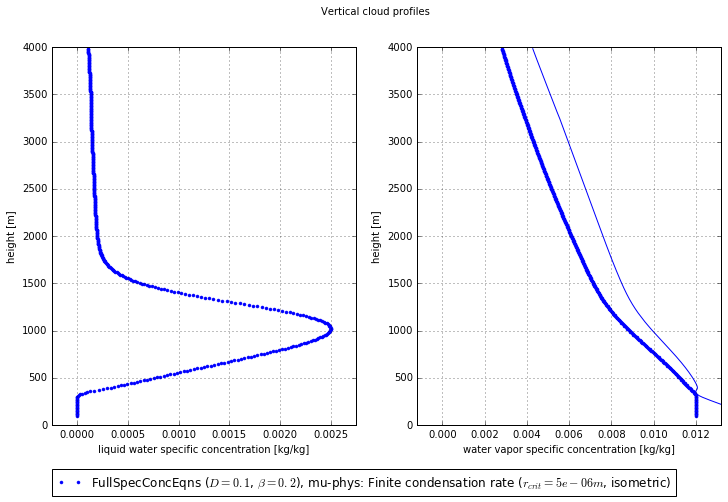

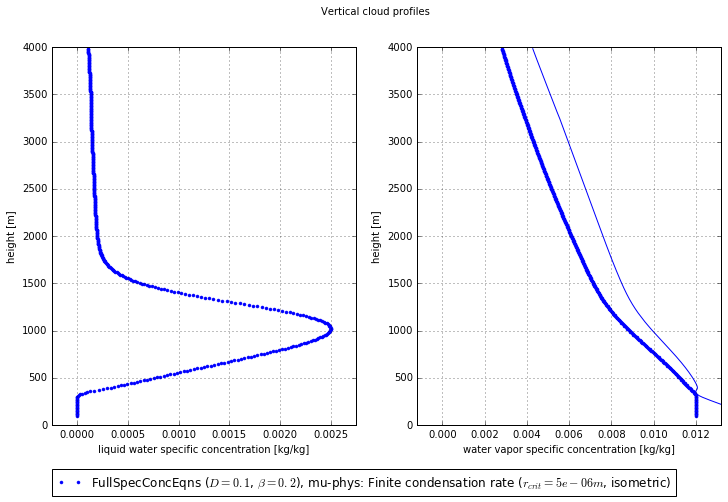

In [8]:
plotting.plot_profiles([profile,], ['q_l', 'q_v'])

In [7]:
print ambient_stratification.gas_properties.cp()


1004.6994545
